In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [3]:
df=pd.read_csv(r"C:\Users\MY\OneDrive\Desktop\JN\archive\zomato.csv" , encoding='unicode_escape')
df

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...
7100,7100,7100,Zoey's,Cafe,4.3,894,600.0,Yes,No,"Cafe, Italian, Continental, Burger",Bellandur,Sarjapur Road
7101,7101,7101,ZOROY Luxury Chocolate,Dessert Parlor,4.0,68,250.0,Yes,No,Desserts,Brigade Road,Church Street
7102,7102,7102,Zu's Doner Kebaps,"Takeaway, Delivery",3.7,33,350.0,No,No,"Turkish, Fast Food, Biryani, Chinese",Malleshwaram,RT Nagar
7103,7103,7103,Zyara,Casual Dining,3.8,191,650.0,Yes,No,"North Indian, Mughlai, Chinese",Kammanahalli,HBR Layout


In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'restaurant name', 'restaurant type',
       'rate (out of 5)', 'num of ratings', 'avg cost (two people)',
       'online_order', 'table booking', 'cuisines type', 'area',
       'local address'],
      dtype='object')

# Cleaning  Data

In [6]:
df=df.drop(["Unnamed: 0" , "Unnamed: 0.1" , "local address"],axis=1)
df

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala"
2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur
...,...,...,...,...,...,...,...,...,...
7100,Zoey's,Cafe,4.3,894,600.0,Yes,No,"Cafe, Italian, Continental, Burger",Bellandur
7101,ZOROY Luxury Chocolate,Dessert Parlor,4.0,68,250.0,Yes,No,Desserts,Brigade Road
7102,Zu's Doner Kebaps,"Takeaway, Delivery",3.7,33,350.0,No,No,"Turkish, Fast Food, Biryani, Chinese",Malleshwaram
7103,Zyara,Casual Dining,3.8,191,650.0,Yes,No,"North Indian, Mughlai, Chinese",Kammanahalli


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant name        7105 non-null   object 
 1   restaurant type        7105 non-null   object 
 2   rate (out of 5)        7037 non-null   float64
 3   num of ratings         7105 non-null   int64  
 4   avg cost (two people)  7048 non-null   float64
 5   online_order           7105 non-null   object 
 6   table booking          7105 non-null   object 
 7   cuisines type          7105 non-null   object 
 8   area                   7105 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 499.7+ KB


In [8]:
df.isnull().sum()

restaurant name           0
restaurant type           0
rate (out of 5)          68
num of ratings            0
avg cost (two people)    57
online_order              0
table booking             0
cuisines type             0
area                      0
dtype: int64

In [9]:
feature_na = [i for i in df.columns if df[i].isnull().sum()>0]
feature_na

['rate (out of 5)', 'avg cost (two people)']

In [10]:
for i in feature_na:
    print(f"{i} has {np.round((df[i].isnull().sum()/len(df[i])*100),4)}%null values")

rate (out of 5) has 0.9571%null values
avg cost (two people) has 0.8023%null values


In [11]:
df.dropna(subset=['rate (out of 5)'], axis=0, inplace=True)

In [12]:
df['rate (out of 5)'].unique()

array([3.4, 3.9, 3.7, 2.7, 2.8, 4.1, 3.2, 3.5, 4.4, 4.2, 4. , 4.3, 3.1,
       3.6, 3.3, 2.9, 3. , 3.8, 2.5, 4.6, 1.8, 2.4, 4.5, 4.9, 2.1, 4.7,
       2.6, 4.8, 2. , 2.3, 2.2])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7037 entries, 0 to 7104
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant name        7037 non-null   object 
 1   restaurant type        7037 non-null   object 
 2   rate (out of 5)        7037 non-null   float64
 3   num of ratings         7037 non-null   int64  
 4   avg cost (two people)  6984 non-null   float64
 5   online_order           7037 non-null   object 
 6   table booking          7037 non-null   object 
 7   cuisines type          7037 non-null   object 
 8   area                   7037 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 549.8+ KB


# Calculate avg rating for each resturant

In [14]:
rating= pd.pivot_table(df, index='restaurant name',values='rate (out of 5)')
rating

,rate (out of 5)
restaurant name,
#FeelTheROLL,3.4
#L-81 Cafe,3.9
#refuel,3.7
'@ Biryani Central,2.7
'@ The Bbq,2.8
...,...
i-Bar - The Park Bangalore,3.8
iFruit Live Ice Creams,3.4
iSpice Resto Cafe,3.7


In [15]:
rating=rating.sort_values(['rate (out of 5)'],ascending=False)
rating[0:15]

,rate (out of 5)
restaurant name,
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine,4.9
Asia Kitchen By Mainland China,4.9
Byg Brewski Brewing Company,4.9
The Pizza Bakery,4.8
Punjab Grill,4.8
O.G. Variar & Sons,4.8
Belgian Waffle Factory,4.8
Biergarten,4.7
Taaza Thindi,4.7


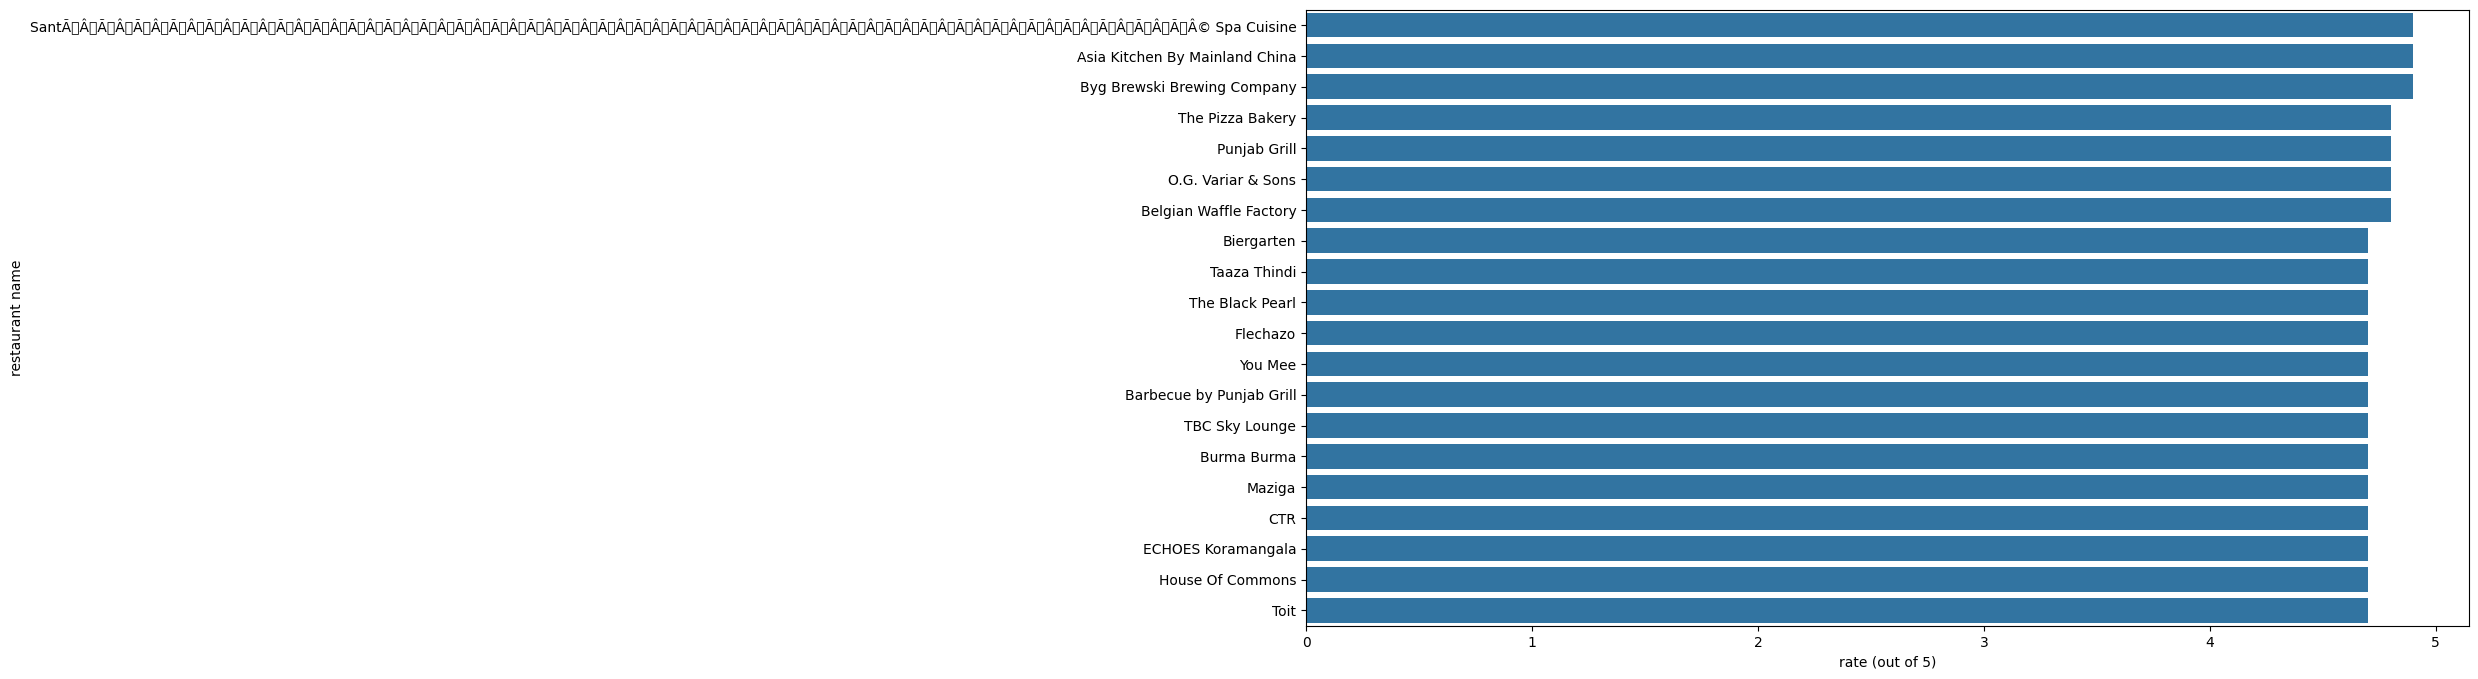

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(x=rating[0:20]['rate (out of 5)'], y=rating[0:20].index, orient="h")
plt.show()

# Distribution of ratings

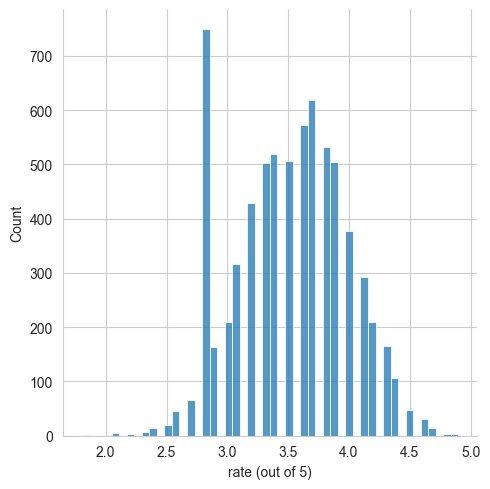

In [17]:
sns.set_style('whitegrid')
sns.displot(df['rate (out of 5)'])

plt.show()

In [18]:
DataToTest = df['rate (out of 5)']

start,p = normaltest(DataToTest)

print("start=%0.2f, p=%0.30f" % (start,p))

if p>0.05:
    print("Normal distribution")
else:
    print("Not a normal distribution")

start=171.48, p=0.000000000000000000000000000000
Not a normal distribution


# Top restaurant chains

In [19]:
df['restaurant name'].value_counts()

restaurant name
#FeelTheROLL                         1
Pizza Paradise                       1
PMR Restaurant                       1
Platter                              1
Plated                               1
                                    ..
Go Gharelu                           1
GMT - Gelateria Montecatini Terme    1
Global Flavors                       1
Glen's Bakehouse                     1
Zyksha                               1
Name: count, Length: 7037, dtype: int64

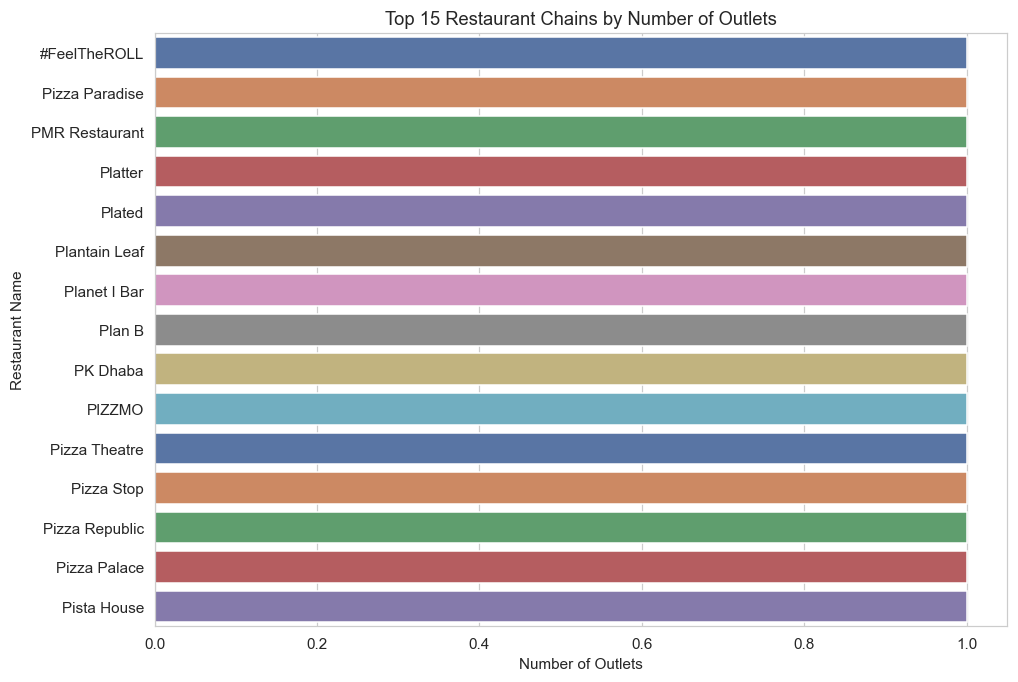

In [20]:
plt.figure(figsize=(10, 7), dpi=110)

chains = df['restaurant name'].value_counts().head(15)


sns.barplot(x=chains, y=chains.index, palette='deep')

plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Name")
plt.title("Top 15 Restaurant Chains by Number of Outlets")

plt.show()

# How many restaurant don't accept online orders

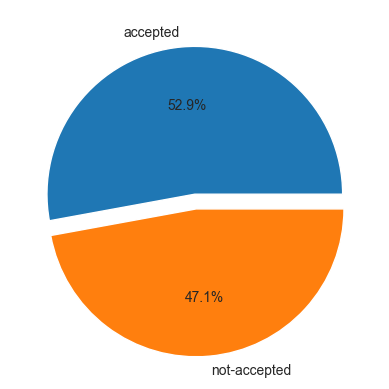

In [21]:
x = df.online_order.value_counts()
labels = ['accepted' , 'not-accepted']
plt.pie(x,labels= labels, explode= [0.0,0.1] , autopct='%1.1f%%')
plt.show()

# How many restaurant had Table Bookings

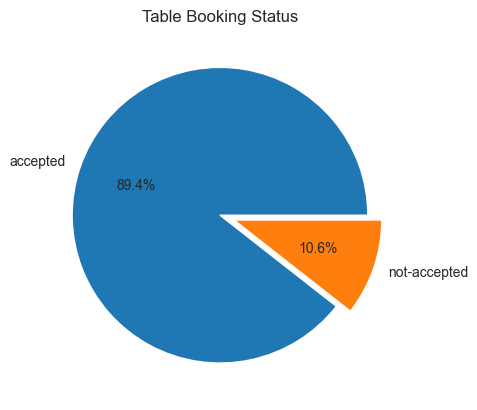

In [22]:
x = df['table booking'].value_counts()
labels = ['accepted', 'not-accepted']

plt.pie(x, labels=labels, explode=[0.0, 0.1], autopct='%1.1f%%')
plt.title('Table Booking Status')
plt.show()

# Analysis on type of restaurant

In [23]:
df.head(4)

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala"
2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli


In [24]:
unique_values = df['restaurant type'].unique()
len(unique_values)

81

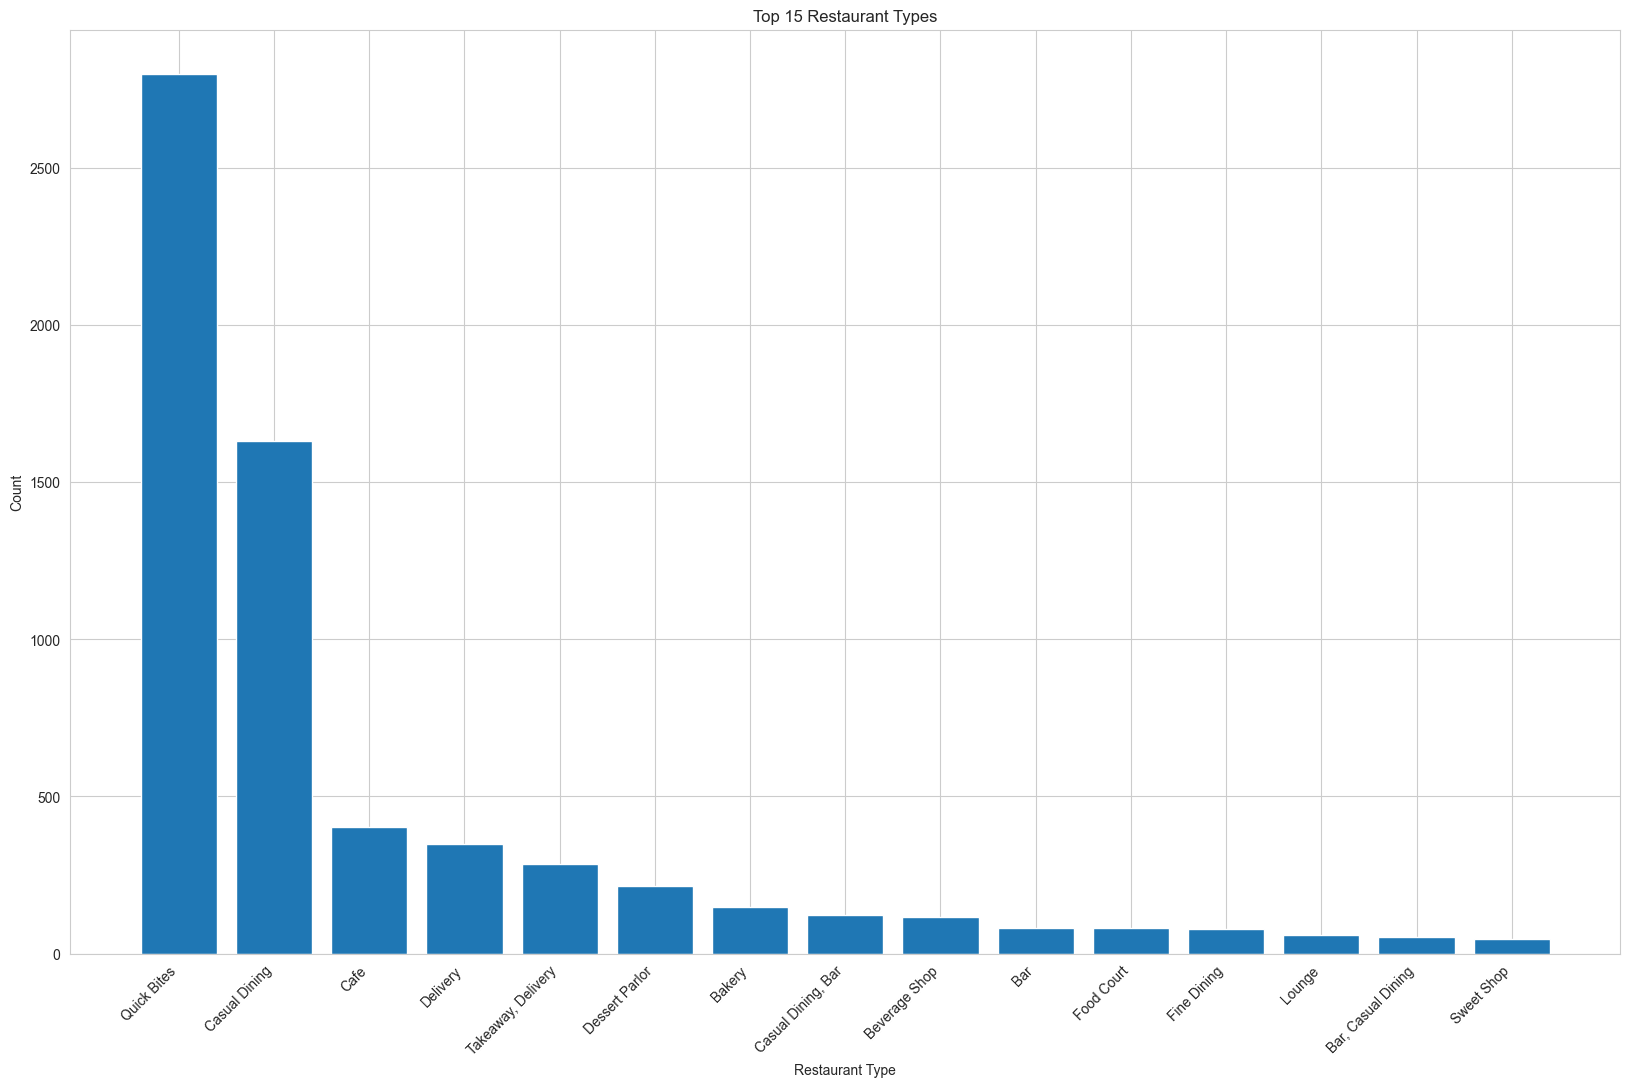

In [25]:
plt.figure(figsize=(20, 12))

restaurant_type_counts = df['restaurant type'].value_counts().head(15)

plt.bar(restaurant_type_counts.index, restaurant_type_counts)


plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.title('Top 15 Restaurant Types')


plt.xticks(rotation=45, ha='right')

plt.show()

# Which restaurant had the highest voting?

In [26]:
df.head()

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala"
2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur


In [27]:
voting = df.groupby('restaurant name')[['num of ratings']].mean()
voting

,num of ratings
restaurant name,
#FeelTheROLL,7.0
#L-81 Cafe,48.0
#refuel,37.0
'@ Biryani Central,135.0
'@ The Bbq,40.0
...,...
i-Bar - The Park Bangalore,617.0
iFruit Live Ice Creams,10.0
iSpice Resto Cafe,28.0


In [28]:
voting['num of ratings'].describe()

count     7037.000000
mean       190.360097
std        594.843837
min          1.000000
25%         15.000000
50%         40.000000
75%        129.000000
max      16345.000000
Name: num of ratings, dtype: float64

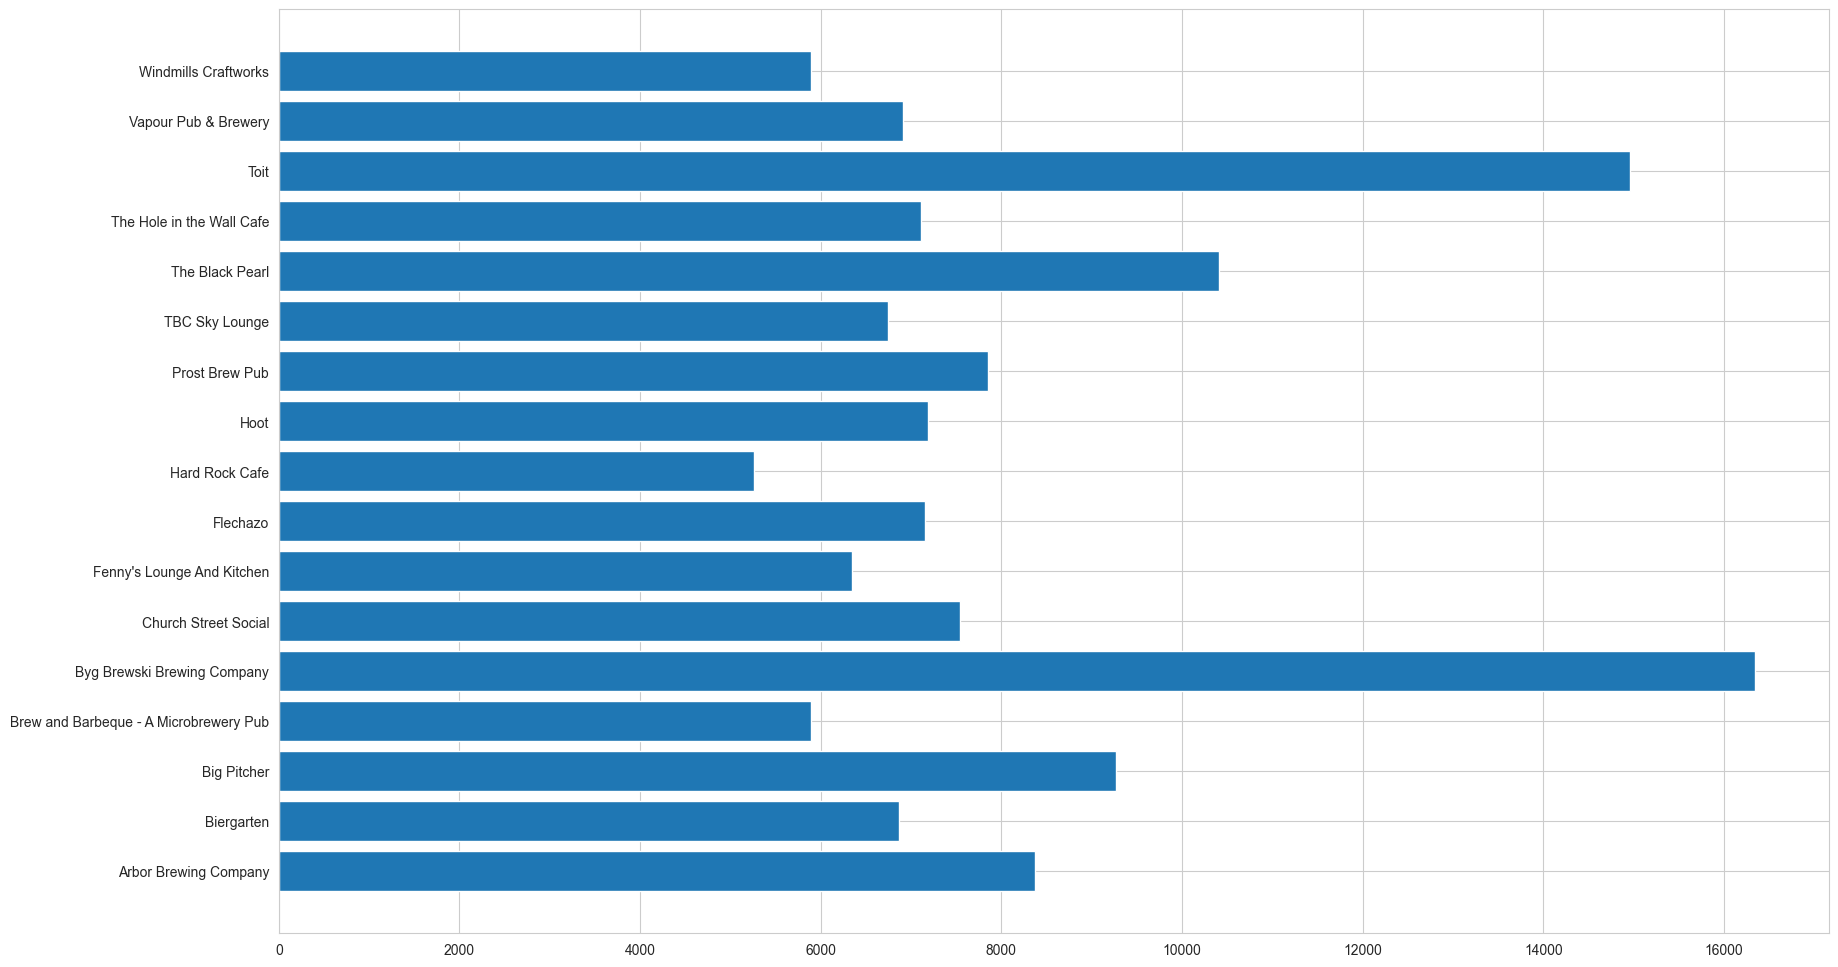

In [29]:
high_vote = voting[voting['num of ratings'] >5000]
plt.figure(figsize=(20,12),dpi=100)
plt.barh(high_vote.index,high_vote['num of ratings'])
plt.show()

# Location in which we have number of highest number of resturant

In [30]:
df.head()

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala"
2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur


In [31]:
location_restro = df[['area']].value_counts()[0:20]
location_restro

area                          
Byresandra,Tavarekere,Madiwala    798
Bannerghatta Road                 552
Brookefield                       477
Brigade Road                      464
Indiranagar                       452
Electronic City                   403
Malleshwaram                      402
Kalyan Nagar                      384
Bellandur                         361
Banashankari                      359
Whitefield                        261
Marathahalli                      260
HSR                               240
Basavanagudi                      198
New BEL Road                      168
Koramangala 4th Block             162
Rajajinagar                       148
Lavelle Road                      141
Jayanagar                         127
Frazer Town                       126
Name: count, dtype: int64

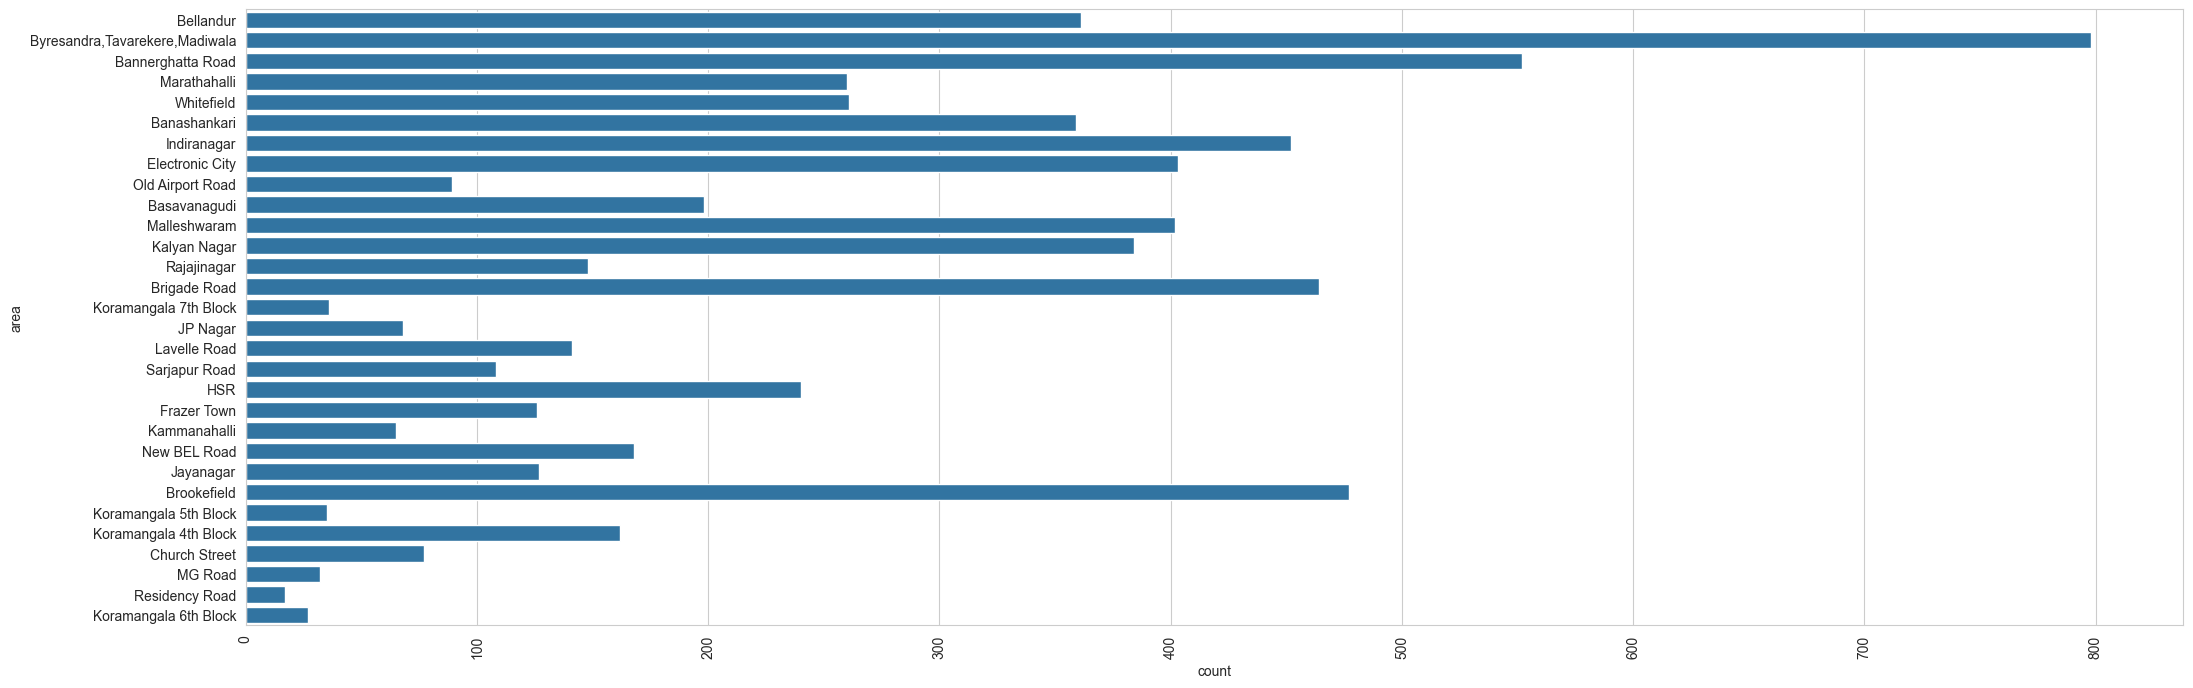

In [32]:
plt.figure(figsize=(25,8))
sns.countplot(df['area'])

plt.xticks(rotation=90)
plt.show()

# Identify Top 10 Cuisines

In [33]:
df.head()

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala"
2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur


In [34]:
df['restaurant type'].value_counts()

restaurant type
Quick Bites              2800
Casual Dining            1632
Cafe                      402
Delivery                  348
Takeaway, Delivery        286
                         ... 
Microbrewery, Lounge        1
Bakery, Beverage Shop       1
Bar, Pub                    1
Quick Bites, Mess           1
Club, Casual Dining         1
Name: count, Length: 81, dtype: int64

cuisines type
North Indian, Chinese                  419
North Indian                           417
South Indian                           343
Fast Food                              134
South Indian, North Indian, Chinese    127
Biryani                                122
Bakery, Desserts                        93
Desserts                                87
Cafe                                    85
Bakery                                  76
Name: count, dtype: int64


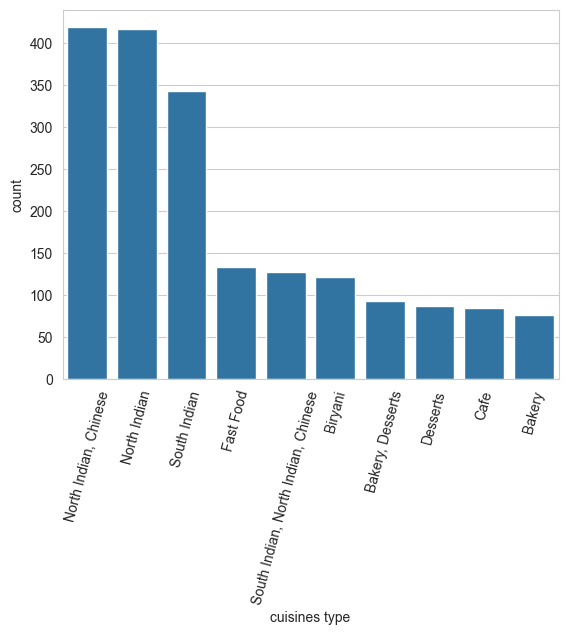

In [35]:
cuisin = df['cuisines type'].value_counts()[0:10]
print(cuisin)

sns.barplot(x=cuisin.index,y=cuisin)
plt.xticks(rotation=75)
plt.show()